# Normalize Data


- There are namy ways of quantizing (normalizing) the data
- The most popular is to normalize data in the range of 0 to 1
- I chose to represent data as Int8, i.e. signed 8-bit integer in range of -128 to 127 because of the currently available machine learning accelarators such as 4 TOPS TPU ([Google Coral](https://www.amazon.com/s?k=Google+Coral&ref=bl_dp_s_web_0)) using [TensorFlow Lite](https://coral.ai/docs/edgetpu/models-intro/)

## Function to normalize the data

- takes a column (an array) of data as an input
- calculates minimum value of the column
- calculates maximum value of the column
- for each row it calculates:

$$ normalized_i = \frac{(value_i - min_{all})}{(max_{all} - min_{all})} $$

OR 

$$ x_i = \frac{(x_i - μ)}{σ} $$

where:
- μ  - **mean** of the whole population
- σ - **standard deviation** of the whole population

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Function-to-normalize-the-data" data-toc-modified-id="Function-to-normalize-the-data-1">Function to normalize the data</a></span></li><li><span><a href="#Set-up" data-toc-modified-id="Set-up-2">Set up</a></span></li><li><span><a href="#Fetch-DataFrame-from-the-CSV-file" data-toc-modified-id="Fetch-DataFrame-from-the-CSV-file-3">Fetch DataFrame from the CSV file</a></span></li><li><span><a href="#Explore-the-Dataset" data-toc-modified-id="Explore-the-Dataset-4">Explore the Dataset</a></span><ul class="toc-item"><li><span><a href="#Print-Columns" data-toc-modified-id="Print-Columns-4.1">Print Columns</a></span></li></ul></li><li><span><a href="#Select-only-the-columns-you-want-to-save" data-toc-modified-id="Select-only-the-columns-you-want-to-save-5">Select only the columns you want to save</a></span></li><li><span><a href="#Normalize-(Quantaize)" data-toc-modified-id="Normalize-(Quantaize)-6">Normalize (Quantaize)</a></span></li></ul></div>

## Set up

In [1]:
data_file_name = "GELYF.csv"
date_format = "yyyy-mm-dd" # 2007.04.05
data_dir_original = "../DATA/original/"
data_dir_processed = "../DATA/processed/"

quantize_column = 3

include("../Julia/function_fetch_dataset.jl") 
include("../Julia/function_quantize_column.jl") 
include("../Julia/function_print_colunms.jl") 

print()

## Fetch DataFrame from the CSV file

In [2]:
df = fetch_dataset(data_file_name, date_format, data_dir_original)

Fetched ../DATA/original/GELYF.csv, record count 3524


,Date,Open,High,Low,Close,Adj Close,Volume
,Date…,Float64,Float64,Float64,Float64,Float64,Int64
1,2007-01-03,0.13,0.13,0.09,0.13,0.086662,147600
2,2007-01-04,0.13,0.13,0.11,0.13,0.086662,303200
3,2007-01-05,0.13,0.13,0.1,0.13,0.086662,322000
4,2007-01-08,0.13,0.13,0.1,0.13,0.086662,316400
5,2007-01-09,0.12,0.13,0.09,0.12,0.079996,282500
6,2007-01-10,0.1,0.12,0.1,0.1,0.066663,246900
7,2007-01-11,0.12,0.12,0.1,0.12,0.079996,126000
8,2007-01-12,0.12,0.13,0.09,0.12,0.079996,61500
9,2007-01-16,0.09,0.13,0.09,0.09,0.059997,326200


## Explore the Dataset

In [3]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Date,,2007-01-03,,2020-12-30,3524,,Date
2,Open,0.866652,0.03,0.46,3.87,,,Float64
3,High,0.879938,0.04,0.47,3.87,,,Float64
4,Low,0.852344,0.02,0.46,3.75,,,Float64
5,Close,0.866649,0.02,0.46,3.76,,,Float64
6,Adj Close,0.79575,0.013333,0.381345,3.53349,,,Float64
7,Volume,1.8739e5,0,88550.0,8618700,,,Int64


### Print Columns

In [4]:
print_colunms(df)
println()

1 Date
2 Open
3 High
4 Low
5 Close
6 Adj Close
7 Volume



## Select only the columns you want to save

In [5]:
using DataFrames

println(names(df))
df_quantize = df[ [:Date, :High ], ] # use Symbol("Adj Close") if name of the columnm includes spaces
print_colunms(df_quantize)
println()

["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
1 Date
2 High



## Normalize (Quantaize)

In [6]:
quantize_column!(df_quantize, 2) # second column

original max-min = 3.83
original standard_deviation = 0.8850830197337782
original population_mean = 0.8799375709421112


In [7]:
using Statistics 
describe(df)[quantize_column,:]

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
3,High,0.879938,0.04,0.47,3.87,,,Float64


In [8]:
using Statistics 
describe(df_quantize)[2,:]

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
2,High,-72.0525,-128.0,-99.0,127.0,,,Float64


# Plot graphically

If the normalization above was done right, the plots retain exactly same shape, regardless that y-axis (vertical) is scaled.

- https://docs.juliaplots.org/latest/layouts/

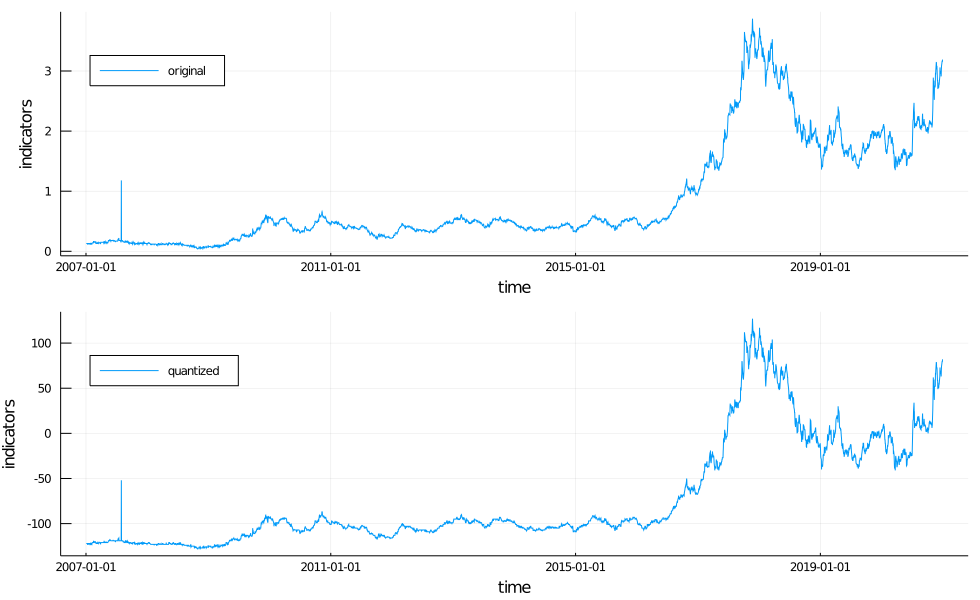

In [9]:
dates     = df[:,1]
original  = df[:, quantize_column]
quantized = df_quantize[:,2]

using Plots

gr()
plot(          df[:,1], # x-axis: dates
               [ original    quantized             ], # y-axis
    label    = [ "original" "quantized" "" ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 600), # width, height
    layout = (2, 1) # number of graphs: vertically, horizontally
    )